In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [3]:
n_samples = 1500 # no.of.data points 

# The dataset function is avialable in sklearn package
noisy_moons,moon_labels = datasets.make_moons(n_samples=n_samples, noise=.1) # Generate Moon Toy Dataset
noisy_circles,circle_labels = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05) # Generate Circle Toy Dataset

print(noisy_moons.shape)
print(moon_labels.shape)

(1500, 2)
(1500,)


In [75]:
noisy_moons

array([[-0.92715102,  0.59486202],
       [ 0.25184102,  0.8200249 ],
       [ 0.41491284, -0.21027878],
       ...,
       [-0.01307214,  0.94600242],
       [ 0.55477944, -0.45859457],
       [ 1.54295542, -0.28348391]])

In [76]:
# Put in Array
noisy_moons=np.array(noisy_moons)
noisy_circles = np.array(noisy_circles)noisy_moons

In [87]:
moon_labels.shape

(1500,)

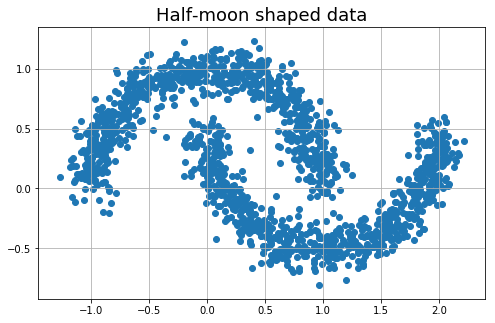

In [7]:
# Plot Half-moon data
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1])
#plt.savefig('M:\Data Science\ce888labs\lab5')
plt.show()

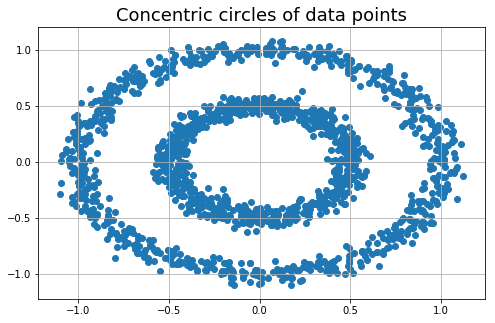

In [8]:
# Plot Circle data
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1])
#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/CIRCLE.png', dpi=300)
plt.show()

## K-Means Clustering

 k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.
The problem is computationally difficult (NP-hard); however, efficient heuristic algorithms converge quickly to a local optimum
K-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That’s why it can be useful to restart it several times.

In [24]:
# Fit K-Means Clustering on noise moon data
km=cluster.KMeans(n_clusters=2)
km.fit(noisy_moons)
km.labels_

array([1, 1, 0, ..., 1, 0, 0])

In [25]:
print("Completeness: %0.3f" % metrics.completeness_score(moon_labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(noisy_moons, km.labels_))

Completeness: 0.197
Silhouette Coefficient: 0.485


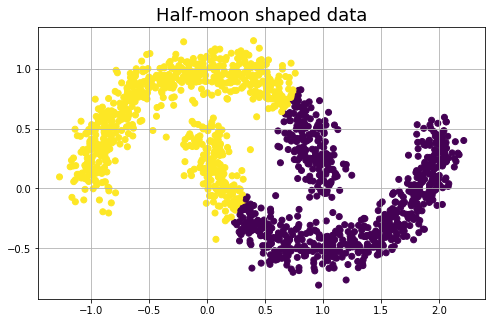

In [26]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=km.labels_)
#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/CLUSTER_MOON.png', dpi=300)
plt.show()

In [27]:
# Fit K-Means Clustering on noise Circle data
km.fit(noisy_circles)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
print("Completeness: %0.3f" % metrics.completeness_score(circle_labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(noisy_circles, km.labels_))

Completeness: 0.000
Silhouette Coefficient: 0.353


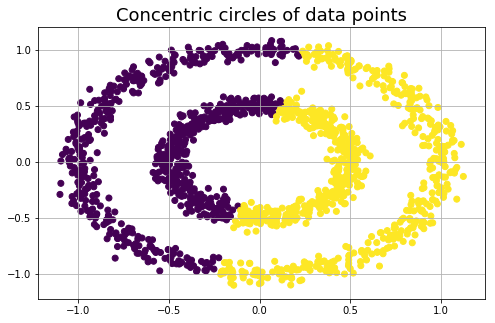

In [29]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=km.labels_)
#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/CLUSTER_CIRCLE.png', dpi=300)
plt.show()

###  Disadvanatges of K-Means Clustering

##### 1) Difficult to predict K-Value.
##### 2) With global cluster, it didn't work well.
##### 3) Different initial partitions can result in different final clusters.

## DBSCAN 

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

In [40]:
# Fit DBSCAN Clustering on noise moon data
dbs = cluster.DBSCAN(eps=0.1) # The maximum distance between two samples for them to be considered as in the same neighborhood.
dbs.fit(noisy_moons)
dbs.labels_

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

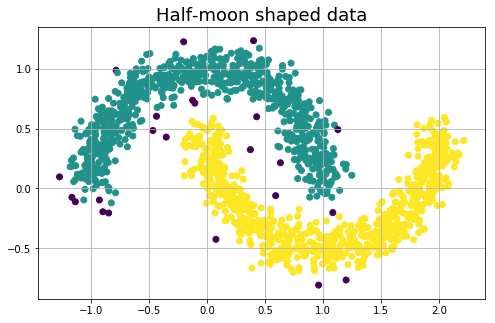

In [41]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=dbs.labels_)
#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/DBSCAN_MOON.png', dpi=300)
plt.show()

In [42]:
# Fit DBSCAN Clustering on noise Circle data
dbs.fit(noisy_circles)
dbs.labels_

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

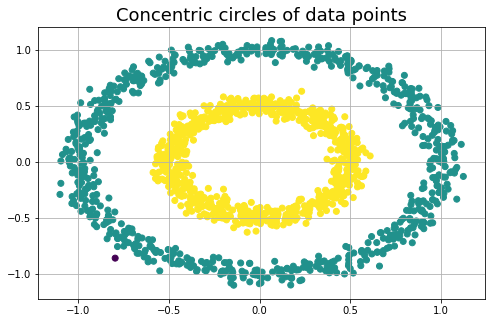

In [44]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=dbs.labels_)
#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/DBSCAN_CIRCLE.png', dpi=300)
plt.show()

# PCA on Moon Data

In [46]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
noisy_moons_spca = scikit_pca.fit_transform(noisy_moons)

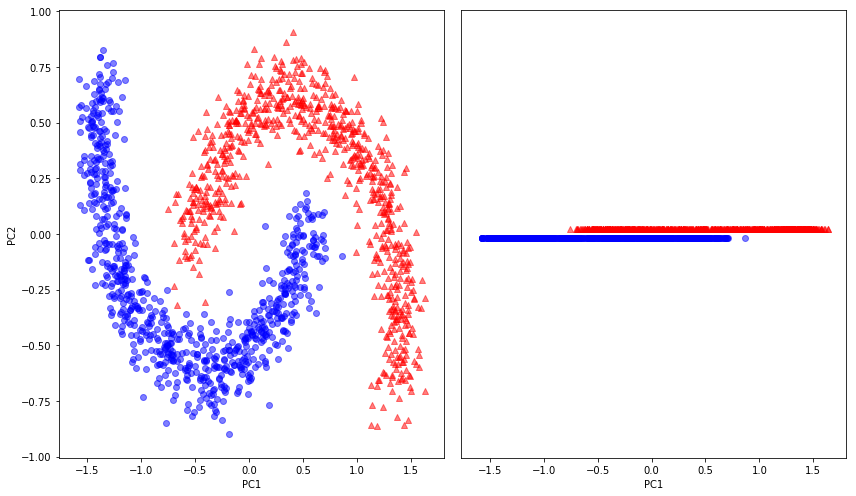

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

ax[0].scatter(noisy_moons_spca[moon_labels == 0, 0], noisy_moons_spca[moon_labels == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(noisy_moons_spca[moon_labels == 1, 0], noisy_moons_spca[moon_labels == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(noisy_moons_spca[moon_labels == 0, 0], np.zeros((750, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(noisy_moons_spca[moon_labels == 1, 0], np.zeros((750, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/PCA_MOON.png', dpi=300)
plt.show()#

          0         1
0  1.000000 -0.436692
1 -0.436692  1.000000


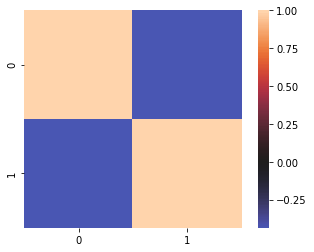

In [51]:
# Compute the correlation matrix before doing PCA
nm=pd.DataFrame(noisy_moons)
pca_corr=nm.corr()
print(pca_corr)
sns.heatmap(pca_corr, vmax=1, center=0, square=True)
#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/CORR_PCA.png', dpi=300)

              0             1
0  1.000000e+00  1.771668e-16
1  1.771668e-16  1.000000e+00


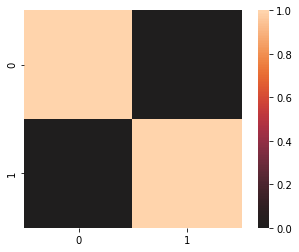

In [52]:
# Compute the correlation matrix after doing PCA
nmp=pd.DataFrame(noisy_moons_spca)
corr_pca=nmp.corr()
print(corr_pca)
sns.heatmap(corr_pca, vmax=1, center=0, square=True)
#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/PCA_CORR.png', dpi=300)

In [53]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
noisy_moons_kpca = scikit_kpca.fit_transform(noisy_moons)

              0             1
0  1.000000e+00  4.684133e-16
1  4.684133e-16  1.000000e+00


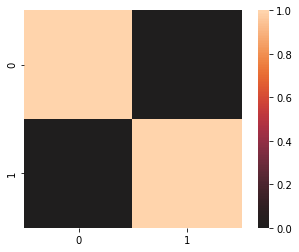

In [54]:
# Compute the correlation matrix after doing PCA

kmp=pd.DataFrame(noisy_moons_kpca)
corr_kpca=kmp.corr()
print(corr_kpca)
sns.heatmap(corr_kpca, vmax=1, center=0, square=True)
#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/KPCA_CORR.png', dpi=300)

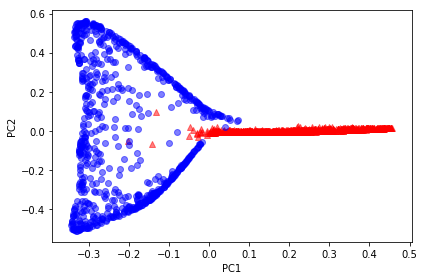

In [55]:
plt.scatter(noisy_moons_kpca[moon_labels == 0, 0], noisy_moons_kpca[moon_labels == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(noisy_moons_kpca[moon_labels == 1, 0], noisy_moons_kpca[moon_labels == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/KPCA_MOON.png', dpi=300)

# Outlier detection

In [56]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.01)
clf.fit(noisy_moons)
y_pred_train = clf.predict(noisy_moons)

pos = y_pred_train > 0
neg = y_pred_train < 0


1485
15


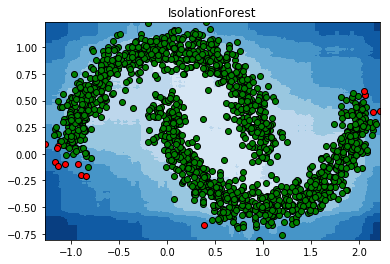

In [59]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(min((noisy_moons[:, 0])), max((noisy_moons[:, 0])), 500), np.linspace(min((noisy_moons[:, 1])), max((noisy_moons[:, 1])), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(noisy_moons[pos][:, 0], noisy_moons[pos][:, 1], c='green', edgecolor='k')
b2 = plt.scatter(noisy_moons[neg][:, 0], noisy_moons[neg][:, 1], c='red', edgecolor='k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/OUTLIER_MOON.png', dpi=300)
print(pos.sum())
print(neg.sum())

In [60]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.01)
clf.fit(noisy_circles)
y_pred_train = clf.predict(noisy_circles)

pos = y_pred_train > 0
neg = y_pred_train < 0

1485
15


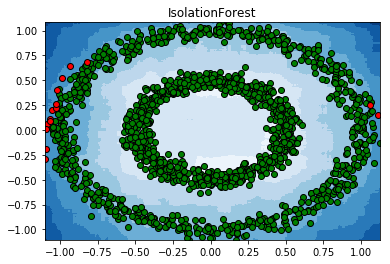

In [62]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(min((noisy_circles[:, 0])), max((noisy_circles[:, 0])), 500), 
                     np.linspace(min((noisy_circles[:, 1])), max((noisy_circles[:, 1])), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(noisy_circles[pos][:, 0], noisy_circles[pos][:, 1], c='green', edgecolor='k')
b2 = plt.scatter(noisy_circles[neg][:, 0], noisy_circles[neg][:, 1], c='red', edgecolor='k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/OUTLIER_CIRCLE.png', dpi=300)
print(pos.sum())
print(neg.sum())

# Clustering and PCA on wine Dataset

In [66]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()
#df_wine.to_csv('WindeData.csv')

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [68]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [67]:
# Task 1:
# Check the counts of each wine class
print("Class label counts:\n",df_wine['Class label'].value_counts())



Class label counts:
 2    71
1    59
3    48
Name: Class label, dtype: int64


In [105]:
# Fetch data into x and y variables
x=df_wine.ix[:,1:14] # Covariates or input
y=df_wine.ix[:,:1] # Labels or classes or output
print(x.columns)
print(y.columns)

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
Index(['Class label'], dtype='object')


In [108]:
y

,Class label
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


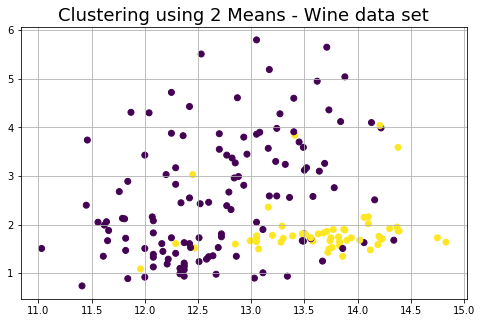

In [114]:
# Task 2
# Clustering using K Means Algorithm

km2=cluster.KMeans(n_clusters=2)
km2.fit(df_wine)
km2.labels_


plt.figure(figsize=(8,5))
plt.title("Clustering using 2 Means - Wine data set", fontsize=18)
plt.grid(True)
plt.scatter(df_wine.iloc[:,1],df_wine.iloc[:,2],c=km2.labels_)
plt.show()

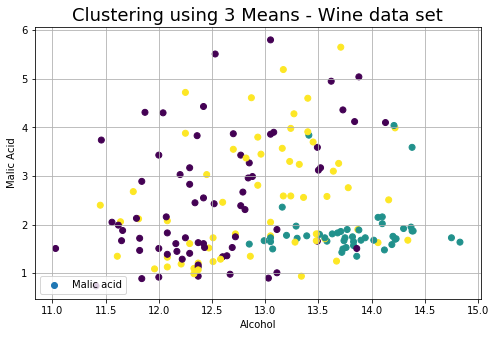

In [183]:
# Task 3
# Scatter plot data into 3 classes based on True Labaels and plot with legends. Hint: use any two variables 

km3=cluster.KMeans(n_clusters=3)
km3.fit(df_wine)
km3.labels_


plt.figure(figsize=(8,5))
plt.title("Clustering using 3 Means - Wine data set", fontsize=18)
plt.grid(True)
plt.scatter(df_wine.iloc[:,1],df_wine.iloc[:,2],c=km3.labels_)
plt.legend(loc='lower left')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()


In [4]:
# Task 4
# Use cluster model labels two group them in predicted classes


In [152]:
# Now we have splitted the data into 70:30 training and test subsets, respectively.

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [153]:
print(pd.value_counts(pd.Series(y)))
print(pd.value_counts(pd.Series(y_train)))
print(pd.value_counts(pd.Series(y_test)))

2    71
1    59
3    48
dtype: int64
2    50
1    41
3    33
dtype: int64
2    21
1    18
3    15
dtype: int64


In [154]:
# Standardizing the data
# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Dimensionality reduction: Principal component analysis using scikit-learn

In [155]:
from sklearn.decomposition import PCA

In [156]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

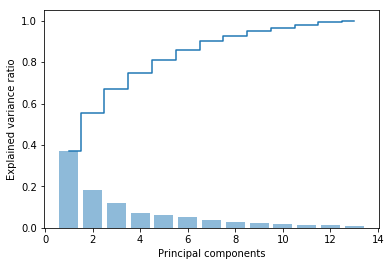

In [157]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/PCA_WINE.png', dpi=300)
plt.show()

In [172]:
# Task 5: Apply PCA with n_components=2 on X_train_std data and transform test data accordingly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

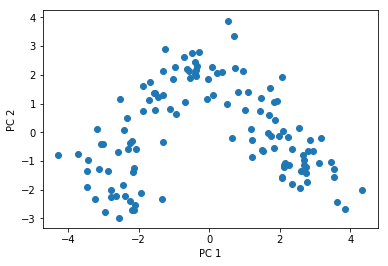

In [173]:
# Plot the first two principal components

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.savefig('PCA_WINE_ULBL.png', dpi=300)
plt.show()

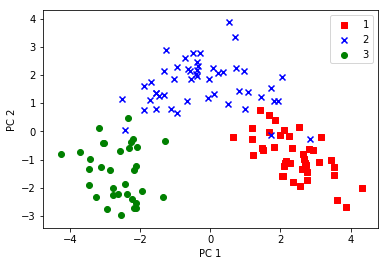

In [174]:
# Plot of two best principal components using y_train data
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.savefig('PCA_WINE_LBL.png', dpi=300)

In [180]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [186]:
X_train_pca

array([[ 3.85641154, -2.66984554],
       [-2.52614194,  1.15316424],
       [-3.4550073 , -1.90429478],
       [-1.54174592,  1.37413254],
       [ 2.67172008, -0.962243  ],
       [-1.94349087, -2.10541819],
       [ 0.50905021,  0.98699848],
       [ 2.60875524, -1.33475284],
       [ 1.48465617, -0.60411934],
       [ 2.7488583 , -1.43440176],
       [ 2.84187909, -0.28511715],
       [-2.19160504, -0.28788805],
       [-2.23675086, -2.40559448],
       [-0.27870589,  2.790656  ],
       [-2.07800678, -0.56720148],
       [ 0.22728915,  2.05358997],
       [-0.04468794,  1.85099649],
       [ 2.65042194, -0.79066117],
       [-2.11672503, -2.69999727],
       [-2.85672098, -1.36293832],
       [-2.124722  , -1.2348399 ],
       [ 1.72785023,  1.53761742],
       [-2.38307168, -2.21014913],
       [-2.94520286, -2.76927053],
       [ 1.92928235,  1.08425103],
       [-0.70920288,  2.61386231],
       [-2.18326817, -2.70105869],
       [ 0.74265223,  2.24801729],
       [ 2.57051007,

###  Training logistic regression classifier using the first 2 principal components.

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Task 6: Apply Logistic Regression on training features and predict test features

lr = LogisticRegression()
lr = lr.fit(X_train_pca,y) # Train a Logistic regression model
pred_lab=lr.predict(X_test_pca) # Test on the test data
print("Accuracy on test is = %f" % (100 * accuracy_score(y_test, pred_lab)))

ValueError: Found input variables with inconsistent numbers of samples: [124, 178]

In [179]:
# Plot the decision region on training features and test labels using classifier you have trained above

plot_decision_regions(................, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the training data')
plt.savefig('TRAIN_CLASS.png', dpi=300)
plt.show()

SyntaxError: invalid syntax (<ipython-input-179-06095280a8fe>, line 3)

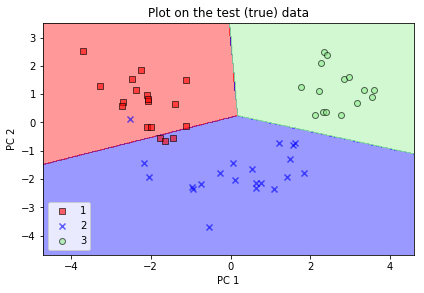

In [317]:
#  Plot the decision region on test features and true labels using classifier you have trained above
plot_decision_regions(..........., classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the test (true) data')
plt.savefig('TEST_CLASS_TRUE.png', dpi=300)
plt.show()

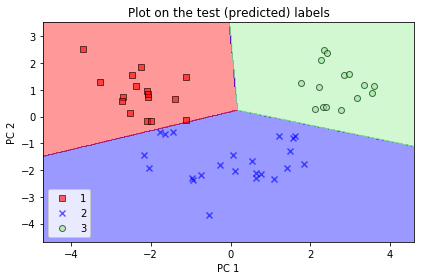

In [318]:
#  Plot the decision region on test features and predicted labels using classifier you have trained above
plot_decision_regions(X_test_pca, pred_lab, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title('Plot on the test (predicted) labels')
plt.tight_layout()
#plt.savefig('C:/Users/hr17576/OneDrive - University of Essex/Teaching/CE888/ce888-master_HR/ce888-master/graphics/lec6/TEST_CLASS.png', dpi=300)
plt.show()